# 다중 선형회귀분석 연습

체질검사 데이터를 활용하여, 체질 비만도를 예측하기 위한 회귀분석 모델을 생성

## 1. 데이터 불러오기

In [36]:
# 데이터 전처리
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 데이터 모델링
from sklearn.model_selection import train_test_split

# 회귀분석
from statsmodels.formula.api import ols # 회귀분석 모델 생성
from statsmodels.api import qqplot, add_constant # 잔차항 분석, 상수항
import statsmodels.formula.api as smf # 선형 모델 생성
from statsmodels.tools.eval_measures import rmse # 평가함수
from sklearn.metrics import r2_score # 결정계수 평가지표
from statsmodels.stats.outliers_influence import variance_inflation_factor # 다중공산성

In [37]:
# 그래프 속성
mpl.rc('font', family = 'Malgun Gothic')
mpl.rc('axes', unicode_minus = False)

In [5]:
# 데이터 불러오기
df_raw = pd.read_csv('C:/Users/user/Desktop/TodayLearn/TiL/Code/data/body.csv')
print(df_raw.shape)
df_raw.head()

(252, 14)


,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [6]:
df_raw.columns

Index(['FAT', 'AGE', 'WEIGHT', 'HEIGHT', 'NECK', 'CHEST', 'ABDOMEN', 'HIP',
       'THIGH', 'KNEE', 'ANKLE', 'BICEPS', 'FOREARM', 'WRIST'],
      dtype='object')

## 2. 변수간의 경향성 확인

<Figure size 864x864 with 0 Axes>

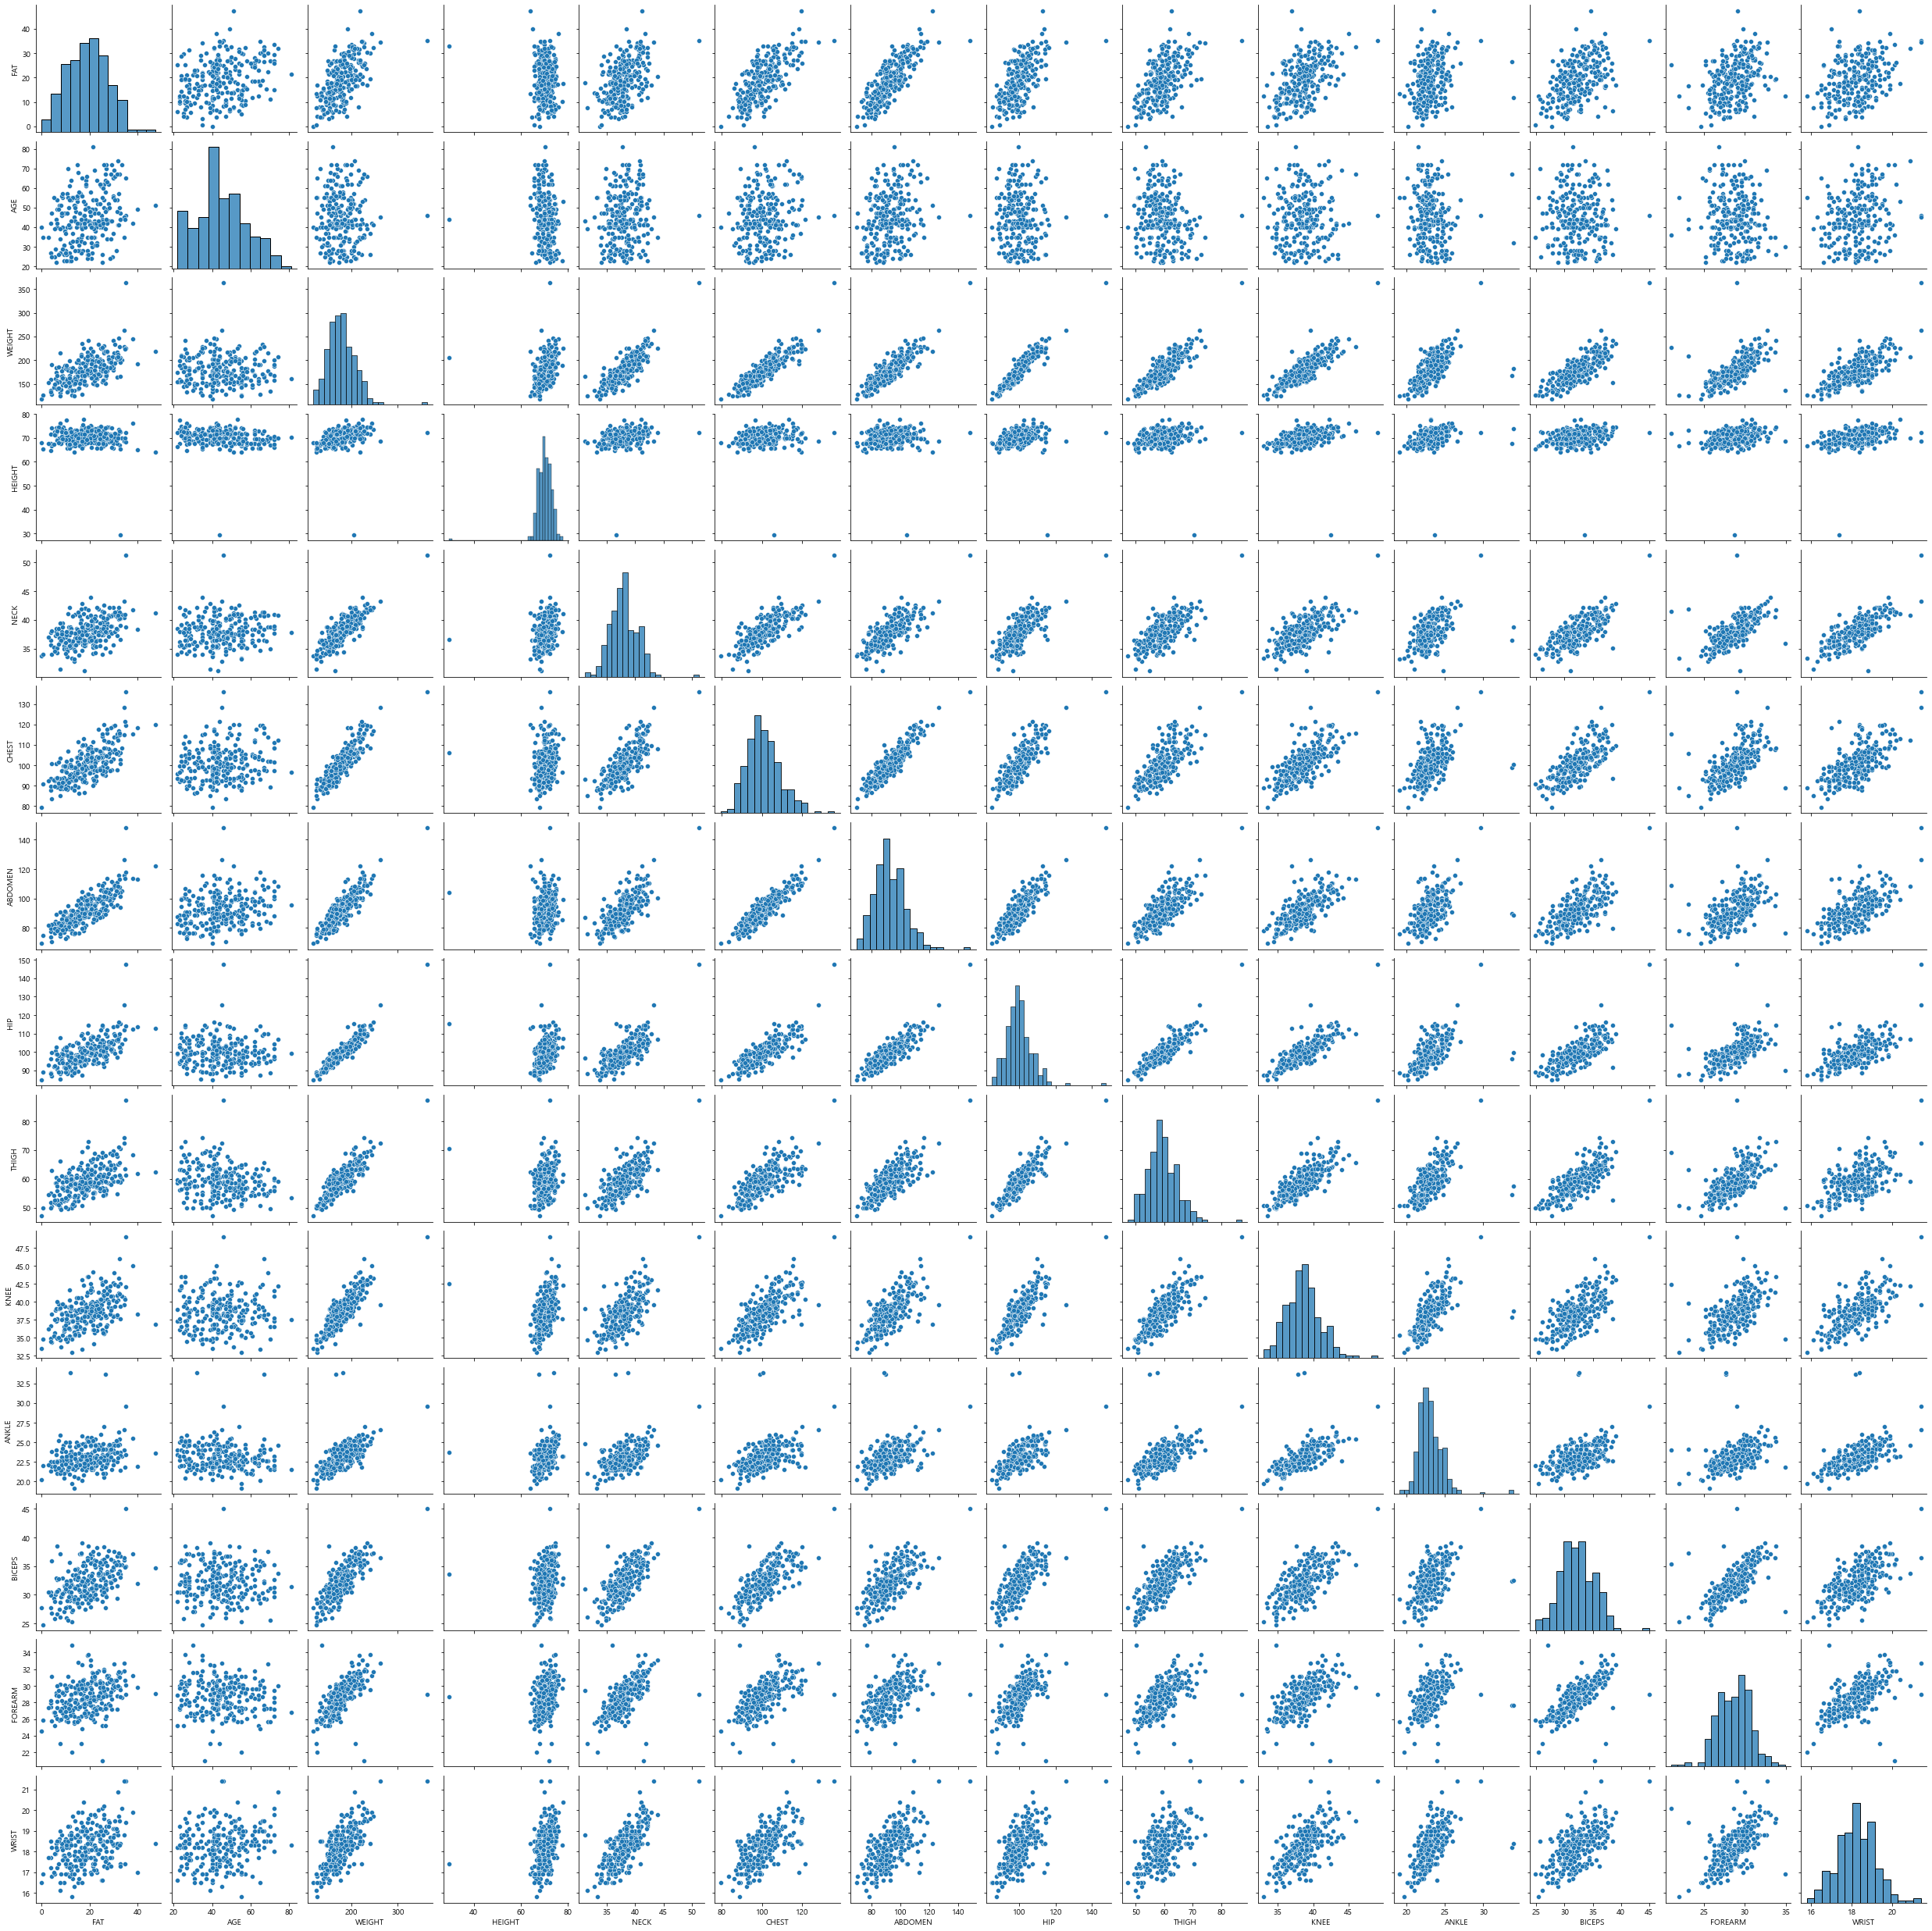

In [7]:
plt.figure(figsize = (12,12))
sns.pairplot(df_raw)
plt.show()

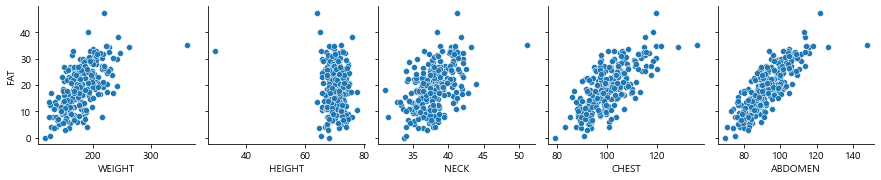

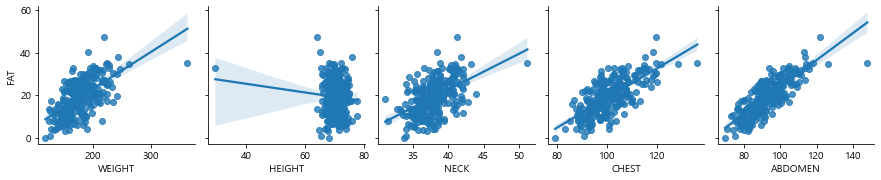

In [10]:
# 산점도 행렬
sns.pairplot(df_raw, y_vars = 'FAT', x_vars = ['WEIGHT','HEIGHT','NECK','CHEST','ABDOMEN'], diag_kind = None)

# 회귀 적합선 추가
sns.pairplot(df_raw, y_vars = 'FAT', x_vars = ['WEIGHT','HEIGHT','NECK','CHEST','ABDOMEN'], diag_kind = None, kind = 'reg')

In [12]:
# 상관계수 분석
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


1. 체질 비만도(FAT)와 가슴 둘레, 복부 둘레, 엉덩이 간의 높은 선형관계 확인  
2. 무게(WEIGHT)와 다중공산성 문제를 확인해야하는 변수들이 존재함을 확인

## 3. 회귀 모델 생성: 설명 변수 전체

In [13]:
# 학습용/평가용 데이터 분리
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1217)
print('학습용 데이터 크기: {}'.format(df_train.shape))
print('테스트 데이터 크기: {}'.format(df_test.shape))

학습용 데이터 크기: (176, 14)
테스트 데이터 크기: (76, 14)


In [14]:
# 선형 회귀 모델
reg_model = smf.ols(formula = 'FAT~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE +ANKLE + BICEPS + FOREARM + WRIST',
                   data = df_train)

# 모델 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     41.04
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           1.78e-44
Time:                        11:35:13   Log-Likelihood:                -497.88
No. Observations:                 176   AIC:                             1024.
Df Residuals:                     162   BIC:                             1068.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.1495     20.036     -0.956      0.3

## 3. 회귀 모델 생성: 유의하지 않은 변수 제거

In [15]:
# 유의하지 않은 변수들 제거
reg_model = smf.ols(formula = 'FAT~WEIGHT+ABDOMEN+FOREARM+WRIST', data = df_train)

# 모델 피팅
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     130.9
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           5.89e-51
Time:                        11:35:33   Log-Likelihood:                -502.75
No. Observations:                 176   AIC:                             1016.
Df Residuals:                     171   BIC:                             1031.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -42.4983      8.651     -4.913      0.0

__다중 선형회귀분석 모델 해석__

- Adj. R-squared 해석 (모델의 설명력)
- Prob(F-statistic): 유의미성 검증결과 (p<0.05) -> 이 모형이 주어진 표본 뿐 아니라 모집단에서도 의미 잇는 모형이다 볼 수 있음
- 회귀계수(coef): 해당 변수가 1증가할 때마다 y가 회귀계수만큼 증가한다는 것을 의미함
- 5% 유의수준을 정해서 P값이 작으면(P<0.05) '통계적으로 유의미하다'
- 즉, 해당 변수가 증가할 때 y의 변화는 유의수준 5%에서 통계적으로 유의미하다.

## 4. 다중공산성 문제를 확인

In [16]:
# 설명 변수간의 다중공산성 확인
df_raw_x = df_train[['WEIGHT','ABDOMEN','FOREARM','WRIST']]
# statsmodels의 상수항 추가
df_raw_x_const = add_constant(df_raw_x)

# VIF(분산팽장계수) 10을 기준으로 넘으면 제거
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif['vif'] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
df_vif.sort_values(by = 'vif', ascending = False)

,variable,vif
0,const,721.824999
1,WEIGHT,6.918498
2,ABDOMEN,4.824395
4,WRIST,2.267285
3,FOREARM,1.679619


## 5. 잔차 검정

In [18]:
reg_result

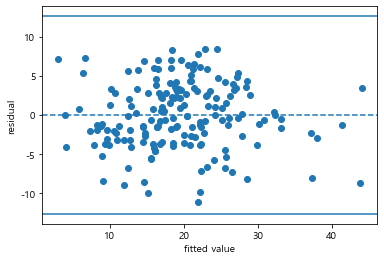

In [29]:

plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y = 0, linestyle = '--')
plt.axhline(y = 3 * np.std(reg_result.resid))
plt.axhline(y = -3 * np.std(reg_result.resid))

잔차가 관리기준(3표준편차)을 초과하는 데이터가 없고 경향성을 보이지 않기 때문에 잔차는 독립성을 만족한다

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


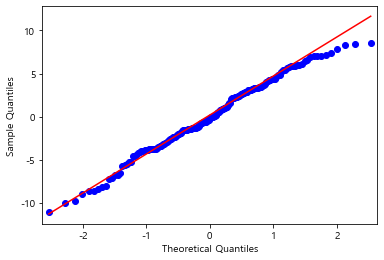

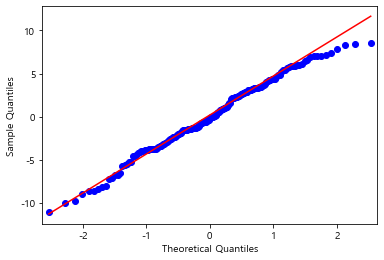

In [30]:
# 잔차의 정규성에 대한 검정(QQPLOT)
qqplot(reg_result.resid, line = 'q')

## 6. 최종 모델 선정, 변수 중요도

FAT = -42.50- 0.16(WEIGHT) + 1.07(ABDOMEN) + 0.64(FOREARM) - 1.45(WRIST)

<AxesSubplot:>

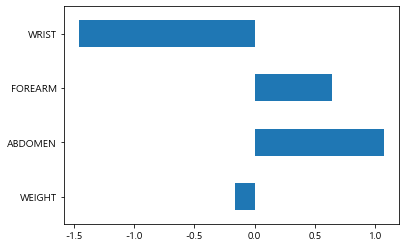

In [33]:
# 설명 변수의 중ㅇ요도
df_explain = pd.DataFrame({'Coef' : reg_result.params.values[1:]}, index = df_raw_x.columns)
df_explain.plot.barh(y = 'Coef', legend = False)

# 7. 모델 평가

In [34]:
y_pred = reg_result.predict(df_test)
print('평가용 데이터의 설명력 : {}'.format(r2_score(df_test['FAT'], y_pred)))

평가용 데이터의 설명력 : 0.6727824172075456


In [79]:
# 로지스틱 회귀분석_연습

# 데이터 전처리
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 데이터 모델링
from sklearn.model_selection import train_test_split
#로지스틱 회귀모델
from statsmodels.api import Logit
# 회귀분석
from sklearn.metrics import accuracy_score # 이진분류 문제에 대한 평가를 위한 함수들
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [80]:
# 1. 데이터 불러오기

# 데이터 불러오기
df_raw = pd.read_csv('C:/Users/user/Desktop/TodayLearn/TiL/Code/data/bank.csv')
print(df_raw.shape)
df_raw.head()

(3748, 13)


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [81]:
df_raw.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [82]:
df_raw.isnull().sum(axis = 0) # 열에 대한 null 처리

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [84]:
df_raw["JOB"].fillna("Other", inplace = True) # jOB 변수의 결측치는 "Other"로 대체

In [85]:
df_raw.fillna(df_raw.mean(), inplace = True)

C:\Users\user\AppData\Local\Temp/ipykernel_3152/4127166621.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(), inplace = True)


In [86]:
df_raw.isnull().sum(axis = 0)

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [87]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)
print("학습용 데이터 크기 : {}".format(df_train.shape))
print("평가용 데이터 크기 : {}".format(df_test.shape))

학습용 데이터 크기 : (2623, 13)
평가용 데이터 크기 : (1125, 13)


In [88]:
# from_formula 함수를 이용한 변수의 역할 지정

log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + DELINQ
+ CLAGE + NINQ + CLNO + DEBTINC""", df_train)

# 모델 적용
log_result = log_model.fit()
# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.2257
Time:                        14:17:56   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942      0.560     -9.100      0.000      -6.191      -3.997

In [89]:
df_raw['JOB'].value_counts() # Mgr 기준으로 다르게 해석

Other      1525
ProfExe     929
Office      623
Mgr         477
Self        130
Sales        64
Name: JOB, dtype: int64

In [90]:
# 유의하지 않은 변수를 제외

log_model = Logit.from_formula("""BAD ~ C(JOB) + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_train)

# 모델 적용
log_result = log_model.fit()
# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.238224
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2611
Method:                           MLE   Df Model:                           11
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.2237
Time:                        14:18:30   Log-Likelihood:                -624.86
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.774e-70
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.1652      0.534     -9.664      0.000      -6.213      -4.118
C(JOB)[T

In [91]:
# 다중선형회귀는 coeff로 화깅ㄴ했었음..
np.exp(log_result.params)

Intercept            0.005712
C(JOB)[T.Office]     0.449199
C(JOB)[T.Other]      0.731600
C(JOB)[T.ProfExe]    0.703780
C(JOB)[T.Sales]      3.627563
C(JOB)[T.Self]       0.963786
DEROG                1.871818
DELINQ               2.119793
CLAGE                0.994838
NINQ                 1.091462
CLNO                 0.975552
DEBTINC              1.115416
dtype: float64

In [92]:
# 학습용 데이터 예측
y_pred = log_result.predict(df_train)
# 0과 1의 값을 가진 class로 변환
y_pred_class = (y_pred > 0.5).astype(int)
print("학습용 데이터 정확도 : {0:.3f}".format(accuracy_score(df_train["BAD"], y_pred_class)))
# 평가용데이터 예측
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
print("평가용 데이터 정확도 : {0:.3f}".format(accuracy_score(df_test["BAD"], y_pred_class)))

학습용 데이터 정확도 : 0.921
평가용 데이터 정확도 : 0.924


In [78]:
df_raw['BAD'].value_counts() # 정확도를 매기는 지표를 다르게 가져야함.. 90퍼센트 이상이 false

0    3403
1     345
Name: BAD, dtype: int64

In [73]:
# 실제 학습용 데이터의 목표변수와 예측값 비교
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["BAD"],y_pred_class)))

Confusion Matrix: 
[[1017    4]
 [  82   22]]


혼동행렬

- 정확도 : Acuuracy (TP + TN) / (ALL)
- 정밀도 : Precision TP / (TP + FP)
- 민감도 : Sensitivity, recall TP / (TP + EN)
- F1 Score : (데이터 불균형이 심할 경우에 사용하는 지표) -> 정밀도 와 민감도 (재현율)의 조화평균

In [96]:
# 실제 학습용 데이터의 목표변수와 예측값 비교
print("Classification Report:", classification_report(df_test["BAD"], y_pred_class))

Classification Report:               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1021
           1       0.82      0.22      0.35       104

    accuracy                           0.92      1125
   macro avg       0.87      0.61      0.65      1125
weighted avg       0.92      0.92      0.90      1125



<AxesSubplot:>

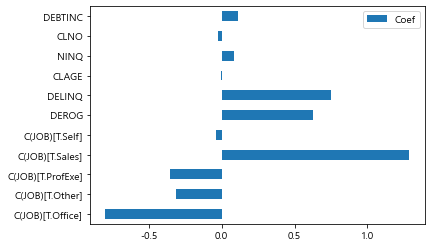

In [97]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")